In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

from matplotlib.colors import LogNorm



In [2]:

####################################################################################################
####################################################################################################

file_all = "../pax_waveform_simulator/merged/merged_all_v180220.pkl"

df_all   = pd.read_pickle(file_all)
df_s1s2   = df_all[df_all['interactions'] == 1]


In [3]:

####################################################################################################
####################################################################################################

nEventsTotal = df_all.shape[0]
nEventsS1S2  = df_s1s2.shape[0]

print()
print("Total Events:   " + str(nEventsTotal))
print("S1 & S2 Events: " + str(nEventsS1S2))
#display(df_s1s2[:][0:5])
print()



Total Events:   2000
S1 & S2 Events: 1205



In [4]:

####################################################################################################
####################################################################################################

arr_s1_true = df_s1s2[:]['s1_photons'].as_matrix()
arr_s1_reco = np.zeros(1) #df_s1s2[:]['reco_s2_electrons'].as_matrix()

arr_s2_true = df_s1s2[:]['s2_electrons'].as_matrix()
arr_s2_reco = df_s1s2[:]['reco_s2_electrons'].as_matrix()

arr_s1_delta = np.zeros(1) #arr_s1_true - arr_s1_reco
arr_s2_delta = arr_s2_true.copy() - arr_s2_reco.copy()



In [5]:

####################################################################################################
####################################################################################################

s1_max_true = np.amax(arr_s1_true)
s1_max_reco = np.amax(arr_s1_reco)

s1_delta_min = np.amin(arr_s1_delta)
s1_delta_max = np.amax(arr_s1_delta)

s2_max_true = np.amax(arr_s2_true)
s2_max_reco = np.amax(arr_s2_reco)

s2_delta_min = np.amin(arr_s2_delta)
s2_delta_max = np.amax(arr_s2_delta)

s1_true_mean = np.mean(arr_s1_true)
s1_reco_mean = np.mean(arr_s1_reco)
s1_true_std  = np.std (arr_s1_true)
s1_reco_std  = np.std (arr_s1_reco)

s2_true_mean = np.mean(arr_s2_true)
s2_reco_mean = np.mean(arr_s2_reco)
s2_true_std  = np.std(arr_s2_true)
s2_reco_std  = np.std(arr_s2_reco)

s1_delta_std  = np.std (arr_s1_delta)
s1_delta_mean = np.mean(arr_s1_delta)
s2_delta_std  = np.std (arr_s2_delta)
s2_delta_mean = np.mean(arr_s2_delta)

s1_label_true = 'true (std: %.01f, mean: %.01f)'% (s1_true_std, s1_true_mean)
s1_label_reco = 'reco (std: %.01f, mean: %.01f)'% (s1_reco_std, s1_reco_mean)
s2_label_true = 'true (std: %.01f, mean: %.01f)'% (s2_true_std, s2_true_mean)
s2_label_reco = 'reco (std: %.01f, mean: %.01f)'% (s2_reco_std, s2_reco_mean)

s1_label_delta = 'Delta S1 (std: %.01f, mean: %.01f)'% (s1_delta_std, s1_delta_mean)
s2_label_delta = 'Delta S2 (std: %.01f, mean: %.01f)'% (s2_delta_std, s2_delta_mean)

print()
print("S1 True Max: " + str(s1_max_true))
print("S1 Reco Max: " + str(s1_max_reco))
print()
print("S2 True Max: " + str(s2_max_true))
print("S2 Reco Max: " + str(s2_max_reco))
print()
print("S1 Delta Min: " + str(s1_delta_min))
print("S1 Delta Max: " + str(s1_delta_max))
print()
print("S2 Delta Min: " + str(s2_delta_min))
print("S2 Delta Max: " + str(s2_delta_max))
print()

s1_max     = 750
s1_nbins   = 750/10

s2_max         = 250
s2_nbins       = 250/5

s1_delta_max   = 50
s1_delta_nbins = 100/2

s2_delta_max   = 45
s2_delta_nbins = 90/2

eps       = 1


S1 True Max: 831
S1 Reco Max: 0.0

S2 True Max: 233
S2 Reco Max: 270.544001939

S1 Delta Min: 0.0
S1 Delta Max: 0.0

S2 Delta Min: -69.5440019387
S2 Delta Max: 29.2138828407



In [6]:

####################################################################################################
####################################################################################################

arr_s1_true_ovflw = arr_s1_true.copy()
arr_s1_reco_ovflw = arr_s1_reco.copy()

arr_s2_true_ovflw = arr_s2_true.copy()
arr_s2_reco_ovflw = arr_s2_reco.copy()

arr_s1_true_ovflw[arr_s1_true_ovflw > s1_max] = s1_max - eps
arr_s1_reco_ovflw[arr_s1_reco_ovflw > s1_max] = s1_max - eps

arr_s2_true_ovflw[arr_s2_true_ovflw > s2_max] = s2_max - eps
arr_s2_reco_ovflw[arr_s2_reco_ovflw > s2_max] = s2_max - eps


####################################################################################################
####################################################################################################

arr_s1_delta_ovflw = arr_s1_delta.copy()
arr_s2_delta_ovflw = arr_s2_delta.copy()

#arr_s1_delta_ovflw[arr_s1_delta_ovflw > +1 * s1_delta_max] = s1_delta_max - eps
#arr_s1_delta_ovflw[arr_s1_delta_ovflw < -1 * s1_delta_max] = s1_delta_max + eps

arr_s2_delta_ovflw[arr_s2_delta_ovflw > +1 * s2_delta_max] = +1 * s2_delta_max - eps
arr_s2_delta_ovflw[arr_s2_delta_ovflw < -1 * s2_delta_max] = -1 * s2_delta_max + eps



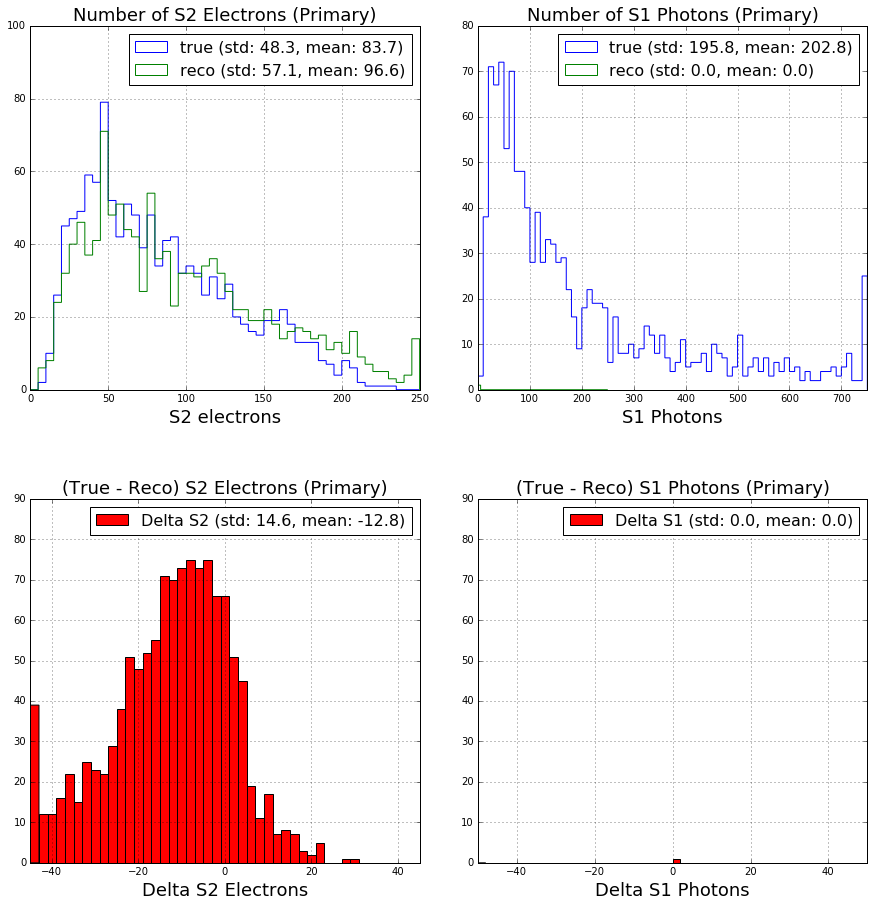


[79 75 70 ..., 75 46 46]
[ 84.59626461  77.33897148  76.37136619 ...,  92.55795547  45.36792321
  49.7243258 ]


In [9]:

####################################################################################################
####################################################################################################

rows = 2
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.3)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 1)
plt.hist(arr_s2_true_ovflw, bins=s2_nbins, range=[0, s2_max], label=s2_label_true, fill=False, histtype='step')
plt.hist(arr_s2_reco_ovflw, bins=s2_nbins, range=[0, s2_max], label=s2_label_reco, fill=False, histtype='step')
plt.ylim([0, 100])
plt.title('Number of S2 Electrons (Primary)', fontsize=18)
plt.xlabel('S2 electrons', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 2)
plt.hist(arr_s1_true_ovflw, bins=s1_nbins, range=[0, s1_max], label=s1_label_true, fill=False, histtype='step')
plt.hist(arr_s1_reco_ovflw, bins=s2_nbins, range=[0, s2_max], label=s1_label_reco, fill=False, histtype='step')
plt.xlim([0, s1_max])
plt.title('Number of S1 Photons (Primary)', fontsize=18)
plt.xlabel('S1 Photons', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 3)

plt.hist(
    arr_s2_delta_ovflw,
    bins=s2_delta_nbins,
    range=[-s2_delta_max, s2_delta_max],
    label=s2_label_delta,
    color='r'
)

plt.xlim([-s2_delta_max, s2_delta_max])
plt.ylim([0, 90])

plt.xlabel('', fontsize=18)
plt.title('(True - Reco) S2 Electrons (Primary)', fontsize=18)
plt.xlabel('Delta S2 Electrons', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 4)

plt.hist(
    arr_s1_delta_ovflw,
    bins=s1_delta_nbins,
    range=[-s1_delta_max, s1_delta_max],
    label=s1_label_delta,
    color='r'
)

plt.xlim([-s1_delta_max, s1_delta_max])
plt.ylim([0, 90])

plt.xlabel('', fontsize=18)
plt.title('(True - Reco) S1 Photons (Primary)', fontsize=18)
plt.xlabel('Delta S1 Photons', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)



####################################################################################################
####################################################################################################

plt.close()
print()
display(fig)
print()

print(arr_s2_true_ovflw)
print(arr_s2_reco_ovflw)


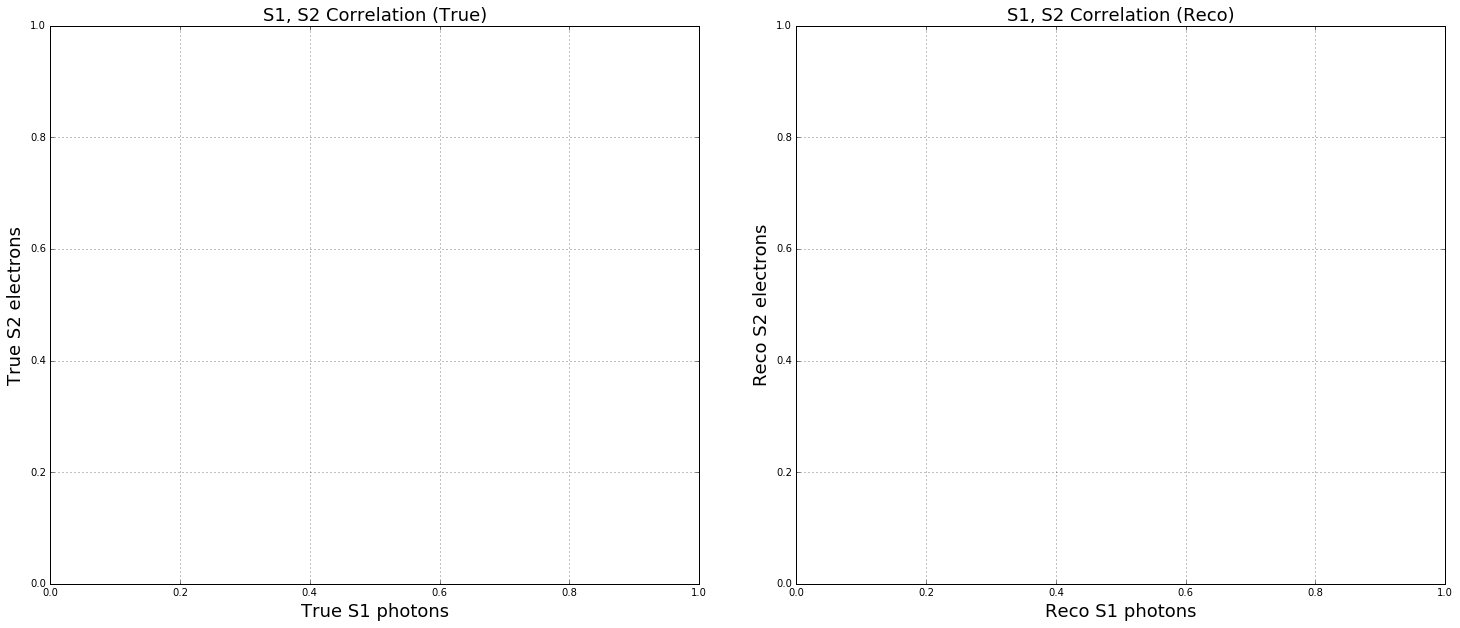

In [57]:


####################################################################################################
####################################################################################################

rows = 1
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.3)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 1)

plt.title('S1, S2 Correlation (True)', fontsize=18)
plt.xlabel('True S1 photons', fontsize=18)
plt.ylabel('True S2 electrons', fontsize=18)
#plt.colorbar()
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 2)

plt.title('S1, S2 Correlation (Reco)', fontsize=18)
plt.xlabel('Reco S1 photons', fontsize=18)
plt.ylabel('Reco S2 electrons', fontsize=18)
#plt.colorbar()
plt.grid(True)


####################################################################################################
####################################################################################################

plt.close()
print()
display(fig)
print()

